## Day 18 Discussions

## Review for LT2: Regular Expressions

In [46]:
import re

#### Test if string has at least one numeric character

In [56]:
print(re.match(r".*[0-9].*",'passw0rd'))

<re.Match object; span=(0, 8), match='passw0rd'>


#### Test if string has at least one capitalized letter

In [55]:
print(re.match(r".*[A-Z].*",'passw0rd'))

<re.Match object; span=(0, 0), match=''>


#### Test if string has at least 10 characters

In [61]:
print(re.match(r"\w{10,}",'123SKU1003123'))

<re.Match object; span=(0, 13), match='123SKU1003123'>


#### Test if string has at least one special character

In [63]:
print(re.match(r".*[@\+!\*\.].*",'Y0ush@lln0tp@ss!'))

<re.Match object; span=(0, 16), match='Y0ush@lln0tp@ss!'>


## Network Analysis

To do in class: Discuss basic graph theory, nodes and edges

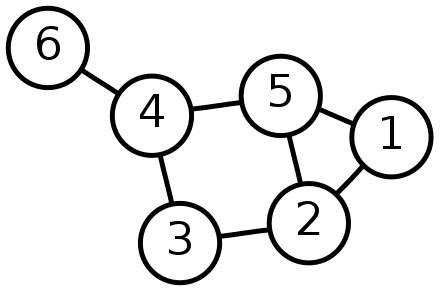

From [Wikipedia](https://en.wikipedia.org/wiki/Graph_theory):

In mathematics, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices (also called nodes or points) which are connected by edges (also called links or lines). A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically; see Graph (discrete mathematics) for more detailed definitions and for other variations in the types of graph that are commonly considered. Graphs are one of the prime objects of study in discrete mathematics.

In one more general sense of the term allowing multiple edges,[3][4] a graph is an ordered triple G = (V, E, ϕ) comprising:

V a set of vertices (also called nodes or points);
E a set of edges (also called links or lines);

In [1]:
import networkx as nx

In [2]:
G=nx.Graph()

In [3]:
G

In [4]:
G.add_node("@jobenilagan")

In [5]:
G.add_nodes_from(["@joeilagan","@eeebieee"])

In [6]:
G.add_node("@chums")

In [7]:
G

#### Add edges

In [8]:
G.add_edge("@jobenilagan","@joeilagan",reltype="follower")

In [9]:
e=("@jobenilagan","@eeebieee")
G.add_edge(*e,reltype="follower")

In [10]:
G.add_edges_from([("@chums","@jobenilagan"),("@joeilagan","@jobenilagan")])

#### Graph Statistics

In [11]:
G.number_of_nodes()

4

In [12]:
G.number_of_edges()

3

In [13]:
G.nodes()

NodeView(('@jobenilagan', '@joeilagan', '@eeebieee', '@chums'))

In [14]:
[n for n in G.nodes()]

['@jobenilagan', '@joeilagan', '@eeebieee', '@chums']

In [15]:
G.nodes["@jobenilagan"]["profile"]={"name":"Joben Ilagan","course":"BSME"}
G.nodes["@chums"]["profile"]={"name":"Matthew Uy","course":"BSME"}
G.nodes["@joeilagan"]["profile"]={"name":"Joe Ilagan","course":"BSME"}
G.nodes["@eeebieee"]["profile"]={"name":"Elizabeth Ilagan","course":"BSCMT"}

In [16]:
nx.get_node_attributes(G,'profile')

{'@jobenilagan': {'name': 'Joben Ilagan', 'course': 'BSME'},
 '@joeilagan': {'name': 'Joe Ilagan', 'course': 'BSME'},
 '@eeebieee': {'name': 'Elizabeth Ilagan', 'course': 'BSCMT'},
 '@chums': {'name': 'Matthew Uy', 'course': 'BSME'}}

In [17]:
nx.get_node_attributes(G,'profile')["@jobenilagan"]["name"]

'Joben Ilagan'

In [18]:
[e for e in G.edges()]

[('@jobenilagan', '@joeilagan'),
 ('@jobenilagan', '@eeebieee'),
 ('@jobenilagan', '@chums')]

In [19]:
G.edges()

EdgeView([('@jobenilagan', '@joeilagan'), ('@jobenilagan', '@eeebieee'), ('@jobenilagan', '@chums')])

In [20]:
nx.get_edge_attributes(G,'reltype')

{('@jobenilagan', '@joeilagan'): 'follower',
 ('@jobenilagan', '@eeebieee'): 'follower'}

#### Adding attributes

### Drawing Graphs

In [21]:
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


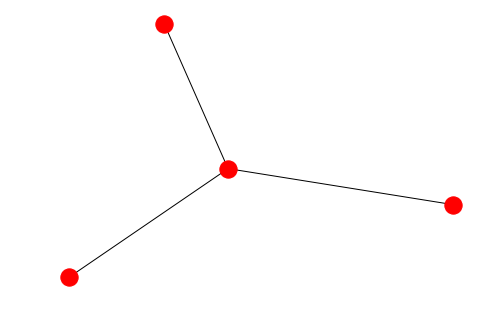

In [22]:
nx.draw(G)

In [23]:
 plt.show()

### Exercise: Load the whole class to the graph


## Introduction to SQL

In [26]:
# First, import the mysql python packages
import mysql.connector
from mysql.connector import MySQLConnection, Error

In [40]:
def query_with_fetchall():
    try:
        conn = mysql.connector.connect(unix_socket='/tmp/mysql.sock',
                                       database='order_mgt',
                                       user='ateneo',
                                       password='ateneo')
        cursor = conn.cursor(dictionary=True)
        cursor.execute("SELECT * FROM customers")
        rows = cursor.fetchall()
        print('Total Row(s):', cursor.rowcount)
        
 
        for row in rows:
            print(row['last_name']+", "+row["first_name"])

    except Error as e:
        print(e)
 
    finally:
        cursor.close()
        conn.close()

In [41]:
query_with_fetchall()

Total Row(s): 19
Poe, Grace
Villar, Cynthia
Cayetano, Pia
Lapid, Lito
Binay, Nancy
Angara, Sonny
Pimentel, Koko
Go, Bong
Estrada, Jinggoy
Roxas, Mar
Marcos, Imee
Revilla, Bong
Aquino, Bam
Osmena, Serge
Dela Rosa, Bato
Ejercito, JV
Ponce Enrile, Juan
Tolentino, Francis
Roque, Harry


In [44]:
import mysql.connector

def mysql_update():
    mydb = mysql.connector.connect(
      unix_socket='/tmp/mysql.sock',
      user="ateneo",
      passwd="ateneo",
      database="order_mgt"
    )

    mycursor = mydb.cursor()

    sql = "UPDATE customers SET city = 'Pasig' WHERE last_name = 'Villar'"

    mycursor.execute(sql)

    mydb.commit()

    print(mycursor.rowcount, "record(s) affected")

In [45]:
mysql_update()

1 record(s) affected
